<a href="https://colab.research.google.com/github/owenfab/IDS/blob/main/HW4/problem1_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IDS HW 4
##Owen Fabula
##Problem 1: Python

##Part 1: Reading Data in and Data cleansing
First, I read the data in to a frame from the raw csv file on GitHub and imported relevant libraries as needed.

In [112]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as mpl

In [113]:
#creating dataframe from raw csv
#get url of raw csv from GitHub and load csv content into data frame
training = pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/adult_training.csv", sep=",")
training

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K
...,...,...,...,...,...,...,...,...,...
14792,43,Self-emp-not-inc,10,Married-civ-spouse,Craft-repair,Male,0,0,<=50K
14793,32,Private,6,Married-civ-spouse,Handlers-cleaners,Male,0,0,<=50K
14794,32,Private,14,Never-married,Tech-support,Male,0,0,<=50K
14795,58,Private,9,Widowed,Adm-clerical,Female,0,0,<=50K


Before I could perform any analysis on the data, I had to cleanse the data. Upon printing out the table, I noticed that some rows had '?' values, and I figured that they might be the stand-in for NA in the original data set. To confirm this, I used the following code:

In [114]:
#find if there are any NA
training.isna().values.any()

False

The above code printed 'False', so I knew that '?' was being used as a placeholder. I also noticed that some values in the capital-gain column were 99999, which made no sense and must have been inputted as a placeholder as well. To rectify the missing values, I first changed each '?' to NaN (and 99999 to NaN for capital-gain), and then imputed by the appropriate value (mean for numeric columns, mode for categorical columns). I imputed by the mean for those values too. The following code does what was described above.

In [115]:
#change each ? (or 99999 for capital-gain) to np.NaN
row = 0 #row index
col = 0 #col index
for i in training.columns: #go through each column
  row = 0 #reset row counter each time
  for j in training[i]: #for each element in each column
    if (j == '?'): #check if '?'
      training.iloc[row,col] = np.NaN #make '?' np.NaN
    row = row + 1 #increment row index
  col = col + 1 #increment col index
#for capital-gain specifically
r = 0 #row index
for k in training['capital-gain']:
  if k == 99999: #placeholder value in capital-gain
    training.iloc[r,6] = np.NaN #change placeholder to np.NaN; 6 is hardcoded because capital-gain is col 6
  r = r + 1 #increment row index

#make sure any of this worked:
print("num NaN after replacement: ",training.isna().values.sum())

#now to impute: numeric columns -> mean; categorical columns -> mode
training['age'] = training['age'].fillna(training['age'].mean())
training['workclass'] = training['workclass'].fillna(training['workclass'].mode()[0])
training['education'] = training['education'].fillna(training['education'].mean())
training['marital-status'] = training['marital-status'].fillna(training['marital-status'].mode()[0])
training['occupation'] = training['occupation'].fillna(training['occupation'].mode()[0])
training['sex'] = training['sex'].fillna(training['sex'].mode()[0])
training['capital-gain'] = training['capital-gain'].fillna(training['capital-gain'].mean())
training['capital-loss'] = training['capital-loss'].fillna(training['capital-loss'].mean())
training['income'] = training['income'].fillna(training['income'].mode()[0])

#check to make sure imputation worked
print("num NaN after imputation: ",training.isna().values.sum())

num NaN after replacement:  1732
num NaN after imputation:  0


##Part 2: Creating and plotting Contingency Tables
###Contingency table between workclass and sex
To create and plot a contingency table between workclass and sex, I sued the following code:

sex               Female  Male
workclass                     
Federal-gov          149   305
Local-gov            377   592
Never-worked           1     4
Private             3951  7159
Self-emp-inc          54   444
Self-emp-not-inc     178   992
State-gov            201   385
Without-pay            1     4


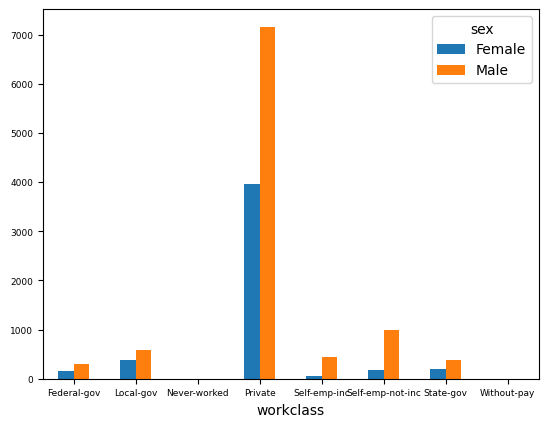

In [116]:
#create contingency table
wc_s_crosstab = pd.crosstab(training.workclass, training.sex)
print(wc_s_crosstab)

#now plot it
barplot = wc_s_crosstab.plot.bar(rot=0,fontsize=6.5)

From the above output, one can see that, relative to females, males hold more positions in every kind of position found in the workclass column.

###Contingency table between sex and marital status
To create and plot a contingency table between sex and marital-status, I used the following code:

marital-status  Divorced  Married-AF-spouse  Married-civ-spouse  \
sex                                                               
Female              1219                  7                 761   
Male                 795                  4                6010   

marital-status  Married-spouse-absent  Never-married  Separated  Widowed  
sex                                                                       
Female                             95           2160        290      380  
Male                              104           2717        182       73  


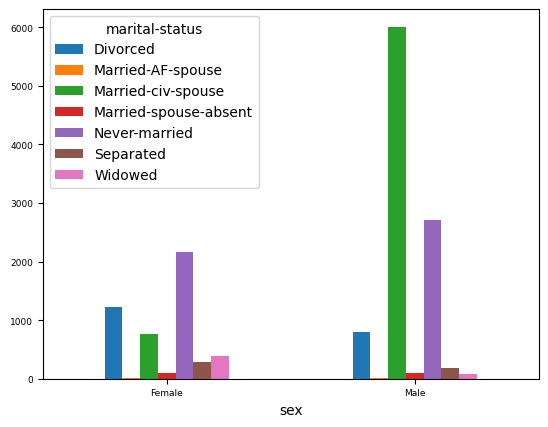

In [117]:
#create contingency table
s_m_crosstab = pd.crosstab(training.sex, training['marital-status'])
print(s_m_crosstab)

#now plot it
barplot = s_m_crosstab.plot.bar(rot=0,fontsize=6.5)

From the above, one can see that females have more representation in the Divorced, Married-AF-Spouse, Separated, and Widowed categories, while males hold more in the other categories.

##Part 3: Creating the adultOver40 dataframe
The dataframe adultOver40 needed all the data from training but only from those rows with age > 40. To create this dataframe, I first added each value from the age column in the training dataframe, but with any age <= 40 replaced with np.NaN; then I added the rest of the column data as it was before. Finally, I used <code>.dropna()</code> to drop any row with np.NaN, which, because we are working with a cleansed dataframe, only occurred where age <= 40. The following code performs the above:

In [118]:
#make new empty dataframe
ageOver40 = pd.DataFrame(columns=['age','workclass','education','marital-status','occupation','sex','capital-gain','capital-loss','income'])
#now, get age column in
ageOver40['age'] = training['age']
row = 0 #row index
for i in training['age']:
  if (i <= 40):
    ageOver40['age'][row] = np.NaN
  else:
    ageOver40['age'][row] = i
  row = row + 1 #increment row index
#now fill rest of columns in
ageOver40['workclass'] = training['workclass']
ageOver40['education'] = training['education']
ageOver40['marital-status'] = training['marital-status']
ageOver40['occupation'] = training['occupation']
ageOver40['sex'] = training['sex']
ageOver40['capital-gain'] = training['capital-gain']
ageOver40['capital-loss'] = training['capital-loss']
ageOver40['income'] = training['income']
#finally, drop any row where age = np.NaN
ageOver40 = ageOver40.dropna(axis=0)
#make sure all np.NaN values are gone
ageOver40.isna().values.any()

False

###New contingency table between sex and marital status
To create a contingency table between sex and marital status with the new dataframe, I used the following code:

In [119]:
#create contingency table
s_m_crosstab_new = pd.crosstab(ageOver40.sex, ageOver40['marital-status'])
print(s_m_crosstab_new)

marital-status  Divorced  Married-civ-spouse  Married-spouse-absent  \
sex                                                                   
Female               720                 305                     38   
Male                 448                3383                     47   

marital-status  Never-married  Separated  Widowed  
sex                                                
Female                    256        133      354  
Male                      315         74       71  


The most noticable difference between the adultOver40 sex and marital-status conintgency table is that there are no adults over 40 whose marital status fits into the Married-AF-spouse category. One again, though, it seems as though there are more female people in the Divorced, Separated, and Widowed categorires, and more male people in the Married-civ-spouse, Married-spouse-absent, and Never-married categories.

##Part 4: Finding outliers in the education field
To find out if there are outliers in the education column, I calculated the z-score of each value in the education column. I then found which z-scores were either > 3 or < -3 (i.e., which were outliers). To do this, I used the following code:

In [120]:
#calculate mean and std dev for education
mean = training['education'].mean()
stdev = training['education'].std()
count = 0
for i in training['education']:
  if ((i - mean) / stdev > 3 or (i - mean) / stdev < -3):
    #if z-score is < -3 or > 3 (i.e., outlier)
    count = count + 1
print("num outliers in education column:", count)

num outliers in education column: 113


From the above output, we can see that there are indeed outliers in the education column.

##Part 5: Standardizing the age column and making a histogram
To standardize the age column, I first added a new column to the dataframe called scaled_age; I then calculated the mean and standard devation for the column, and calculated the z-score of each value in the age column, adding them to the new column. I then counted the number of outliers (i.e., the number of z-scores > 3 or < -3) The following code does just that:

In [122]:
#add new column
training['scaled_age'] = training['age']
#calculate mean and stdev for age
m = training['age'].mean()
s = training['age'].std()
row = 0 #row index
#for each value in scaled_age, calculate its z-score and then change the value to be its z-score
for j in training['scaled_age']:
  training['scaled_age'][row] = ((j-m)/s)
  row = row + 1
count = 0
for k in training['scaled_age']:
  if (k < -3 or k > 3):
    count = count + 1
print("num outliers in scaled_age:",count)

num outliers in scaled_age: 60


From the above output, one can see that there are 60 outliers in the education column.<br />To find the most extreme outlier, I used the following code:

In [126]:
#see how many high or low outliers there are
countHigh = 0
countLow = 0
for m in training['scaled_age']:
  if m > 3:
    countHigh = countHigh + 1
  if m < -3:
    countLow = countLow + 1
print("number of z-scores > 3:",countHigh,"\nnumber of z-scores < -3:",countLow)
print("max of age col:",max(training['age']),"\nmin of age column:",min(training['age']))

number of z-scores > 3: 60 
number of z-scores < -3: 0
max of age col: 90 
min of age column: 17


From the above output, I could see that there were only z-scores > 3, meaning that the most extreme outlier must have been the maximum of the age column; this value is 90.<br /><br />To select records with age at least 80 and create a histogram, I used the following code:

Text(0.5, 1.0, 'Age >= 80')

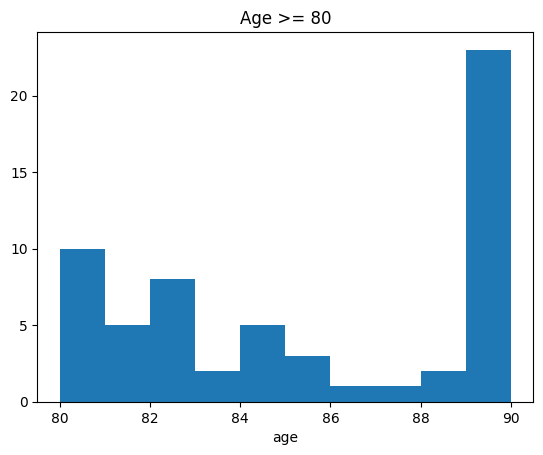

In [133]:
#select records with age >= 80
ageOver80 = training['age']
#now, go through ageOver80 and make any value < 80 np.NaN
k = 0 #row index
for i in ageOver80:
  if i < 80:
    ageOver80[k] = np.NaN
  k = k + 1
#drop all np.NaN, leaving only ages >= 80
ageOver80.dropna()
#plt histogram
mpl.hist(ageOver80)
mpl.xlabel("age")
mpl.title("Age >= 80")

From the above histogram, we can see that there are a lot of age records with value 90, which we identified earlier as the most extreme outlier. It would seem as though there is some sort of age anomaly in this dataset because there are so many outliers.

##Summary of the above
Based on the above analysis, a few conclusions can be drawn.<ul><li>First, according to the workclass and sex contingency table, males have greater representation in every kind of position relative to females.</li><li>According to the sex and marital status contingency table, however, the results are more mixed:<ul><li>Females have greater representation in the following categories of marital status: Divorced, Married-AF-Spouse, Separated, and Widowed</li><li>Males have greater representation in the following categories: Married-civ-spouse, Married-spouse-absent, and Never-married</li></ul></li><li>Then, when the adultOver40 dataframe was created, new conclusions based on the marital status and sex contingency table could be drawn:<ul><li>No adult over 40 fit into the Married-AF-spouse category</li><li>Females had more representation in the following categories: Divorced, Separated, and Widowed</li><li>Males had more representation in the following categories:<li>Married-civ-spouse, Married-spouse-absent, and Never-married </li></ul></li><li>Then, it was discovered that there are indeed outliers in the education column:<ul><li>There are 113 outliers total</li></ul></li><li>Next, it was also discovered that there were outliers for the age column:<ul><li>There are 60 outliers total.</li><li>There were no outliers on the lower end, so the most extreme outlier was 90, the max of the age column.</li></ul></li><li>Finally, based on the histogram of adults >= 80, we could see that there was a potential age anomaly, as there were a lot of adults at age 90, which is an outlier as determined above.</li></ul>